## This notebook shows how you can use more of the `fastplotlib` API to create `Graphic` objects and add them to a `GridPlot`

In [1]:
import numpy as np
from fastplotlib import GridPlot

RFBOutputContext()


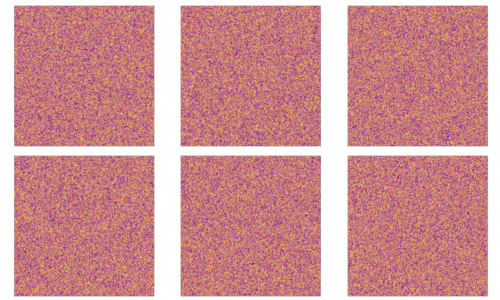

JupyterWgpuCanvas()

In [2]:
# GridPlot of shape 2 x 3 with all controllers synced
grid_plot = GridPlot(shape=(2, 3), controllers="sync")

# Make a random image graphic for each subplot
for subplot in grid_plot:
    # create image data
    data = np.random.rand(512, 512)
    # add an image to the subplot
    subplot.add_image(data, name="rand-img")

# Define a function to update the image graphics with new data
# add_animations will pass the gridplot to the animation function
def update_data(gp):
    for sp in gp:
        new_data = np.random.rand(512, 512)
        # index the image graphic by name and set the data
        sp["rand-img"].data = new_data
        
# add the animation function
grid_plot.add_animations(update_data)

# show the gridplot 
grid_plot.show()

## Accessing subplots within `GridPlot`

In [3]:
# positional indexing
# row 0 and col 0
grid_plot[0, 0]

unnamed: Subplot @ 0x7fd4cc9bf820
  parent: None
  Graphics:
	'rand-img': ImageGraphic @ 0x7fd4f675a350

### You can get the graphics within a subplot, just like with simple `Plot`

In [4]:
grid_plot[0, 1].graphics

('rand-img': ImageGraphic @ 0x7fd4a03295a0,)

### and change their properties

In [5]:
grid_plot[0, 1].graphics[0].vmax = 0.5

### more indexing with `GridPlot`

In [6]:
# you can give subplots human-readable string names
grid_plot[0, 2].name = "top-right-plot"

In [7]:
grid_plot["top-right-plot"]

top-right-plot: Subplot @ 0x7fd4cca0ffd0
  parent: None
  Graphics:
	'rand-img': ImageGraphic @ 0x7fd4a03716c0

In [8]:
# view its position
grid_plot["top-right-plot"].position

(0, 2)

In [9]:
# these are really the same
grid_plot["top-right-plot"] is grid_plot[0, 2]

True

Indexing with subplot name and graphic name

In [10]:
grid_plot["top-right-plot"]["rand-img"].vmin = 0.5